In [2]:
import matplotlib.pyplot as plt
import numpy as np
import data 
import models 
import plot_functions
from pymatreader import read_mat
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import nnmodels

#### Plot standard signal

In [ ]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)

'''
#How to plot
idx = np.where(np.array(groups) == 40)
X[idx]
y = np.array(y)
Xt =np.transpose(X)[idx]
Xtt = np.transpose(Xt)

idxy = np.array(idx)

PA = Xt[idx][np.where(y[idxy]==1)[1]]
AP =  Xt[idx][np.where(y[idxy]==2)[1]]

plt.plot(np.transpose(PA), color = "blue")
plt.plot(np.transpose(AP), color = "red")
plt.show()
'''


#print et enkelt eksempel
#path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/x71487_coil_orient.mat"
path = "/mnt/projects/USS_MEP/COIL_ORIENTATION/sub-X98504_ses-1_task-coilorientation_emg.mat"
data1 = read_mat(path)
if "sub" in path:
    key = list(data1.keys())[3]
else:
    key = list(data1.keys())[0]

X_raw = data1[key]['values'][:,0]
y = data1[key]['frameinfo']['state']
X_raw, y = data.delete_frames(X_raw,y)
print("hey")
plt.plot(X_raw)
plt.show()

## Initial 

In [3]:
main_path = "/mnt/projects/USS_MEP/COIL_ORIENTATION"
filelist = data.get_all_paths(main_path)
X, y, groups, list_subjects = data.get_all_data(filelist)

##### Plot specific subject

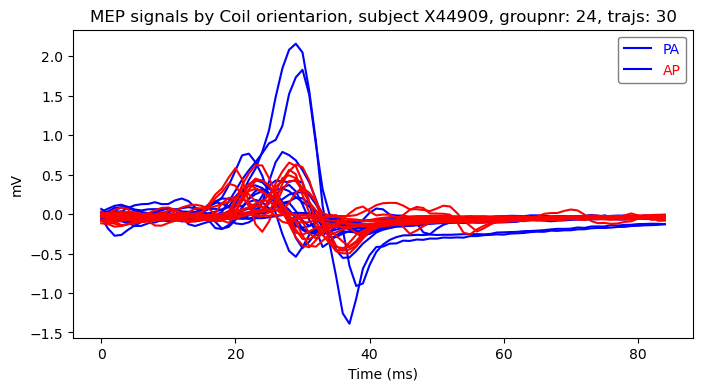

In [4]:
# Plot Specific groups
#plot_groups(X, groups, list_subjects=list_subjects, specifics = [5,18,19,31,32])

# Plot all subjects by coil orientations, PA and AP
#plot_coil(X,y, list_subjects, groups, mean = False, subject = None)

subject = 24 # set specific subject
plot_functions.plot_subject_coil(X,y,list_subjects,groups,mean=False,subject=subject)

##### Logistic Regression models

In [ ]:
#print(np.mean(tot_scores))
#X_amplitude, X_latency,X_ampl_late = data.other_X(X)
#tot_scores, tot_indi_scores, mean_indi_scores = loo_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False)

#print(np.mean(tot_scores))
#score, X_train, X_test, y_train, y_test, predictions = models.logregr(X_train, X_test, y_train, y_test)
#models.confmat(y_test, predictions, score)
#print(score)

In [ ]:
X_norm = data.normalize_X(X, groups)
#tot_scores, tot_indi_scores, mean_indi_scores = models.kfold_logisticregression_prsubject_stratified(X_norm, y, groups, onerow = False, LR = True)
scores, mean_score = models.k10fold_logreg_generel_model(X_norm, y)
#tot_scores_mean = np.mean(tot_scores)
print(f"mean score: {mean_score}")
#barplot(groups, mean_indi_scores, acc = tot_scores_mean)


tot_scores, tot_indi_scores, mean_indi_scores = models.kfold_logisticregression_prsubject_stratified(X_latency, y, groups, onerow = True, LR = True)
tot_scores_mean = np.mean(tot_scores)
#barplot(groups, mean_indi_scores, acc = tot_scores_mean)

##### Differentiate

In [ ]:
# Diffentiate X, Note that the first element of each row will be lost after differentiation since there is no previous element to calculate the difference with.    X_diff = np.diff(X, axis=1)
X_diff = np.diff(X, axis=1)

##### FFT
For other representation of the data

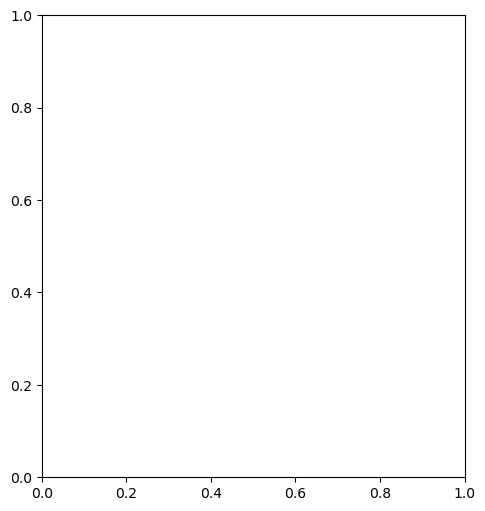

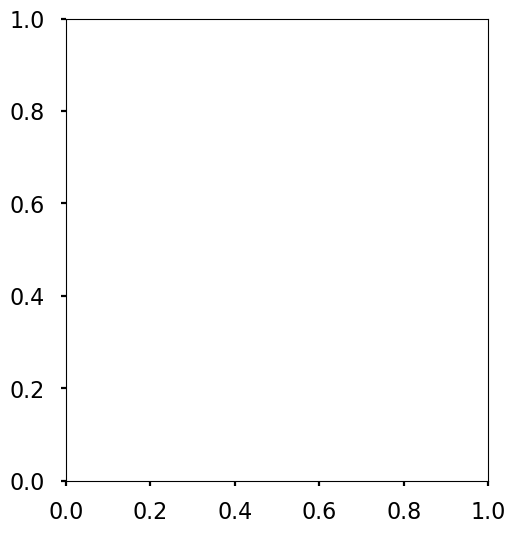

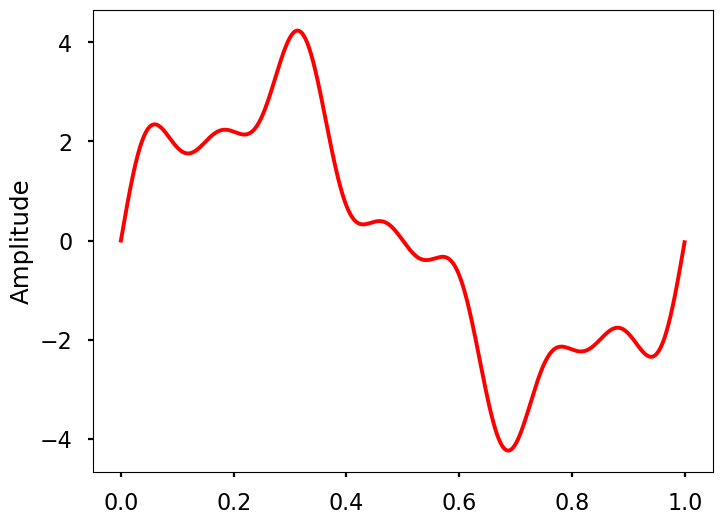

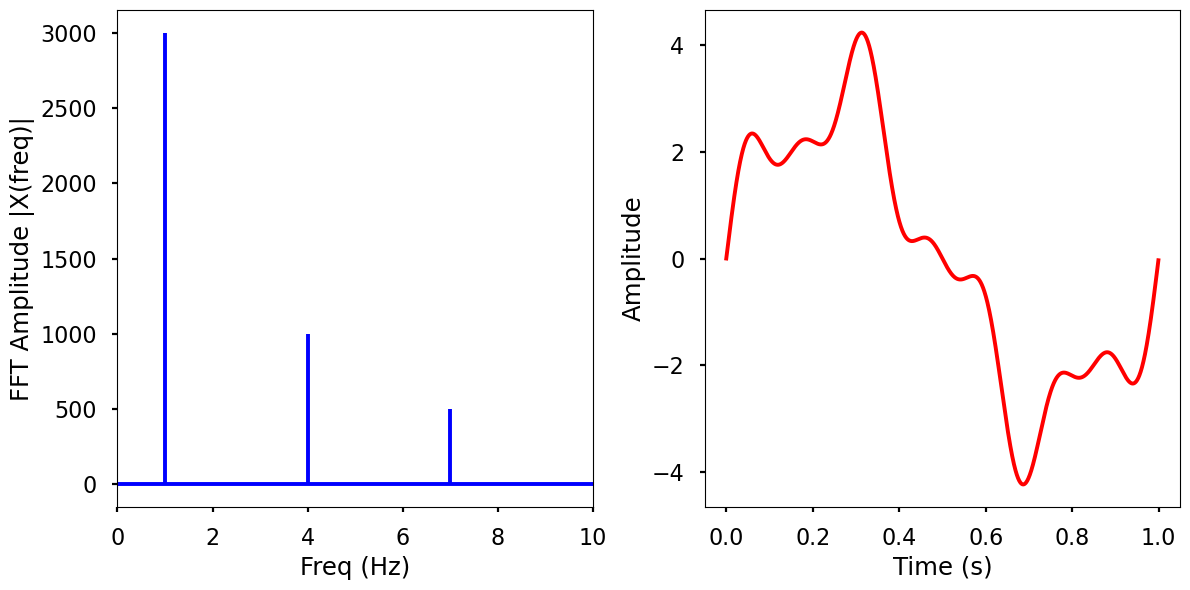

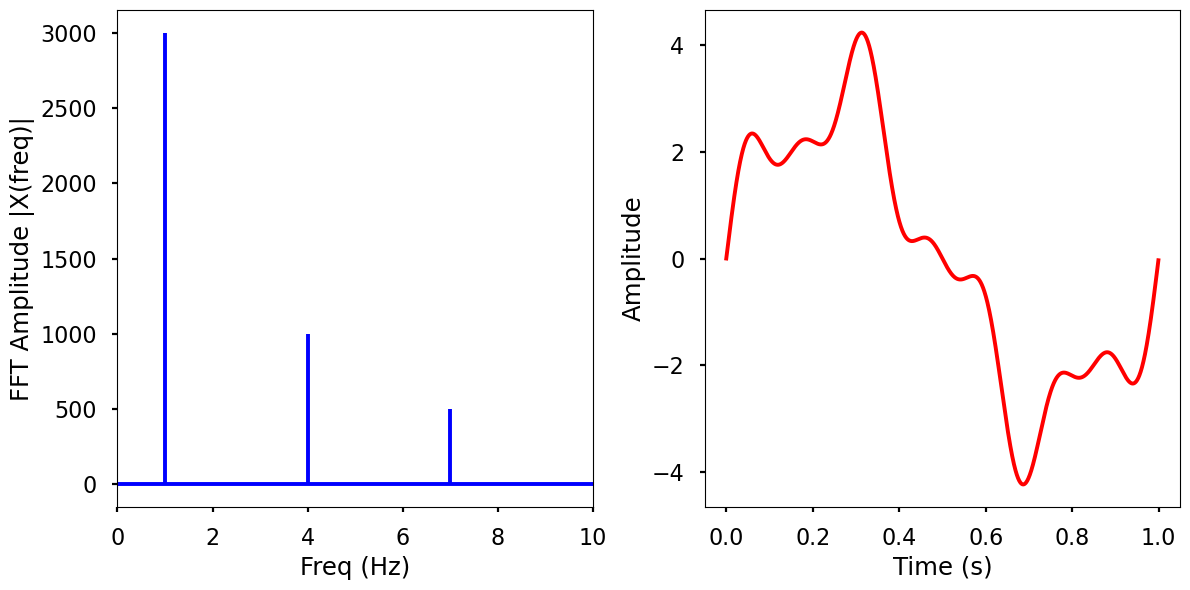

In [ ]:

from scipy.fftpack import fft, ifft
def FFT(X):
    plt.style.use('seaborn-poster')
    sr = 2000  # Sample rate (Hz)
    ts = 1.0/sr # sampling interval
    t = np.arange(0,1,ts)

    X = fft(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 10)

    plt.subplot(122)
    plt.plot(t, ifft(X), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    '''

    for i in range(np.transpose(X).shape[0]):
        # Compute the power spectrum for signal i
        ps = np.abs(np.fft.rfft(np.transpose(X)[i])) ** 2
        
        # Compute the corresponding frequencies
        freqs = np.fft.rfftfreq(len(np.transpose(X)[i]), d=1/fs)
        
        # Plot the power spectrum for signal i
        plt.plot(freqs, ps)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.title(f'Power spectrum for signal {i+1}')
        plt.show()
    ''' 
    X_fft = np.fft.fft(X, axis=0)# virker ikke
    return X_fft


X_fft = FFT(X) #prøv også X_norm



##### CNN, RNN, LSTM models

In [ ]:
tot_scores, tot_indi_scores, mean_indi_scores = nnmodels.SimpleRNN(X, y, groups)
# CNN add weight decay og dropout, over flere epochs, flere conv lag
# transformer med attention, for at lave et andet featuresæt der kan mappe tidsserien en embedding der viser convolutive repræsenterer ikke hvor i serien det sker. 
# tidspunktet skal embeddes i vektoren, vi ved ikke helt hvordan. FIND EN EMBEDDING - se i transformer ecg data om der er en embedding. 


##### Transformer model